In [12]:
import pandas as pd
import numpy as np
import sys
import gzip
from math import radians, cos, sin, asin, sqrt
import matplotlib.pyplot as plt

stations_filename = 'stations.json.gz'
station_fh = gzip.open(stations_filename, 'rt', encoding='utf-8')
stations = pd.read_json(station_fh, lines=True)

city_data = pd.read_csv('city_data.csv')


In [13]:
stations['avg_tmax/10']=stations['avg_tmax']/10
city_data['area/km']=(city_data['area']/1000000).round(2)
city_data['density']=city_data['population']/city_data['area/km']
cityNnull = city_data[city_data.density.notnull()].reset_index()

In [14]:
stnLoc= pd.DataFrame()
stnLoc['lat'] = stations['latitude']
stnLoc['lon'] = stations['longitude']
cityLoc = pd.DataFrame()
cityLoc['lat'] = cityNnull['latitude']
cityLoc['lon'] = cityNnull['longitude']

In [74]:
# adapted from stackoverflow https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
def distanceEachPt(LatLon1, LatLon2):
    lat1 = LatLon1[0]
    lon1 = LatLon1[1]
    lat2 = LatLon2[0]
    lon2 = LatLon2[1]
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

def distance(city, stations):
    LatLon1 = city.values
    s = stations.values
    oneCity = np.apply_along_axis(distanceEachPt, 1, s, LatLon1)
    return oneCity



In [75]:
# s = stnLoc.values
# LatLon1 = cityLoc.iloc[0].values
# x = np.apply_along_axis(distanceEachPt, 1, s, LatLon1)
# type(x)
# distance(cityLoc.iloc[0], stnLoc)

array([  783.37639941,   128.45948717,   465.67759123, ...,  3322.46422488,
        3339.4175117 ,  2452.81222187])

In [76]:
def best_tmax(city, stns):
    aCity = distance(city, stns)
    bestindex = np.argmin(aCity)
    best = stations['avg_tmax/10'].iloc[bestindex]
    return best
    

In [77]:
# best_tmax(cityLoc.iloc[0], stnLoc)

12.152328767123288

In [78]:
cityTmax = cityLoc.apply(best_tmax, stns=stnLoc, axis=1)


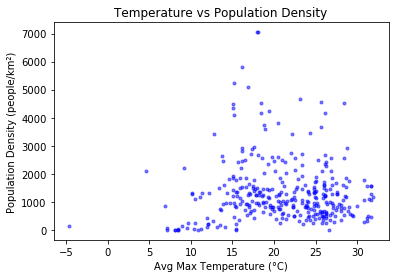

In [79]:

plt.plot(cityTmax, cityNnull['density'], 'b.', alpha=0.5)
plt.title('Temperature vs Population Density')
plt.xlabel('Avg Max Temperature (\u00b0C)')
plt.ylabel('Population Density (people/km\u00b2)')

plt.show()
plt.savefig('output.svg')
